Modiul 9

with Dashbord


In [2]:
# Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import data as data

data= pd.read_csv('data.csv')

In [4]:
# Checking data type

data.info()
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors= 'coerce')
data['SeniorCitizen']= data['SeniorCitizen'].astype('str')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical vales of the numerical variables

data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [6]:
# Top 5 rows of the data

data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


# Data Exploration

In [7]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

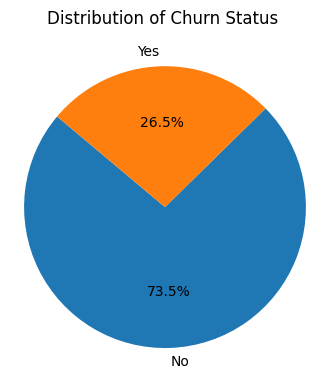

In [8]:
plt.figure(figsize=(4,4))
output_counts = data['Churn'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Churn Status \n')
plt.ylabel('')

plt.show()

The distribution of target variables in unbalanced. It will be biased towards Non-churn customer during machine learning.

In [9]:
numeric_data= data[data.select_dtypes(include=['float']).columns.to_list()]

In [10]:
numeric_data

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


In [11]:
print(data.select_dtypes(include=['float']).columns)
print(data.select_dtypes(include=['int']).columns)

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['tenure'], dtype='object')


Box plot for numerical features:


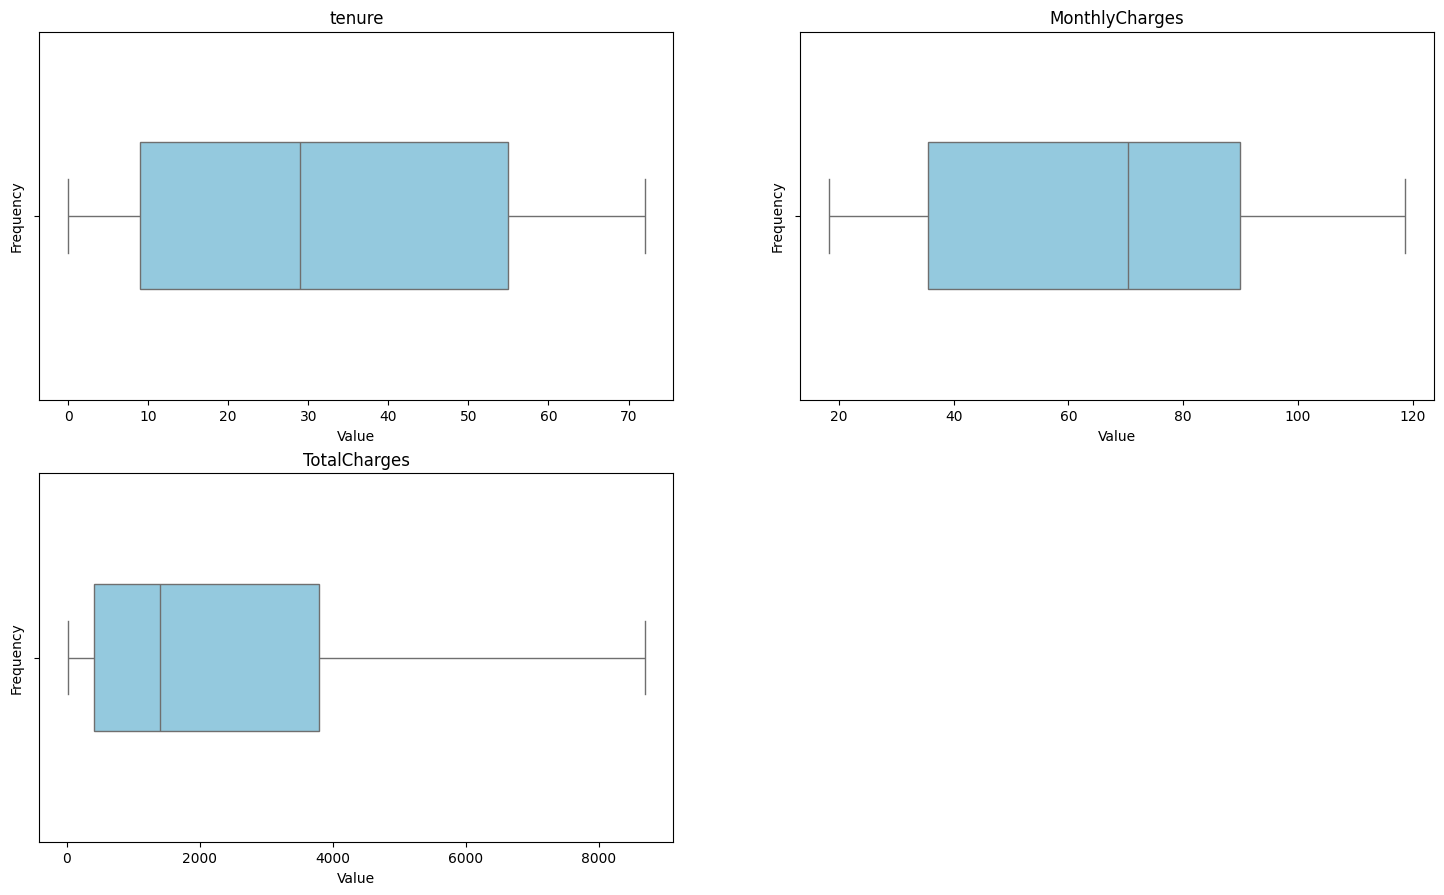

In [12]:
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['tenure','MonthlyCharges','TotalCharges']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=data[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

In [13]:
data.select_dtypes(include=['object']).columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

Count plot for categorical features:


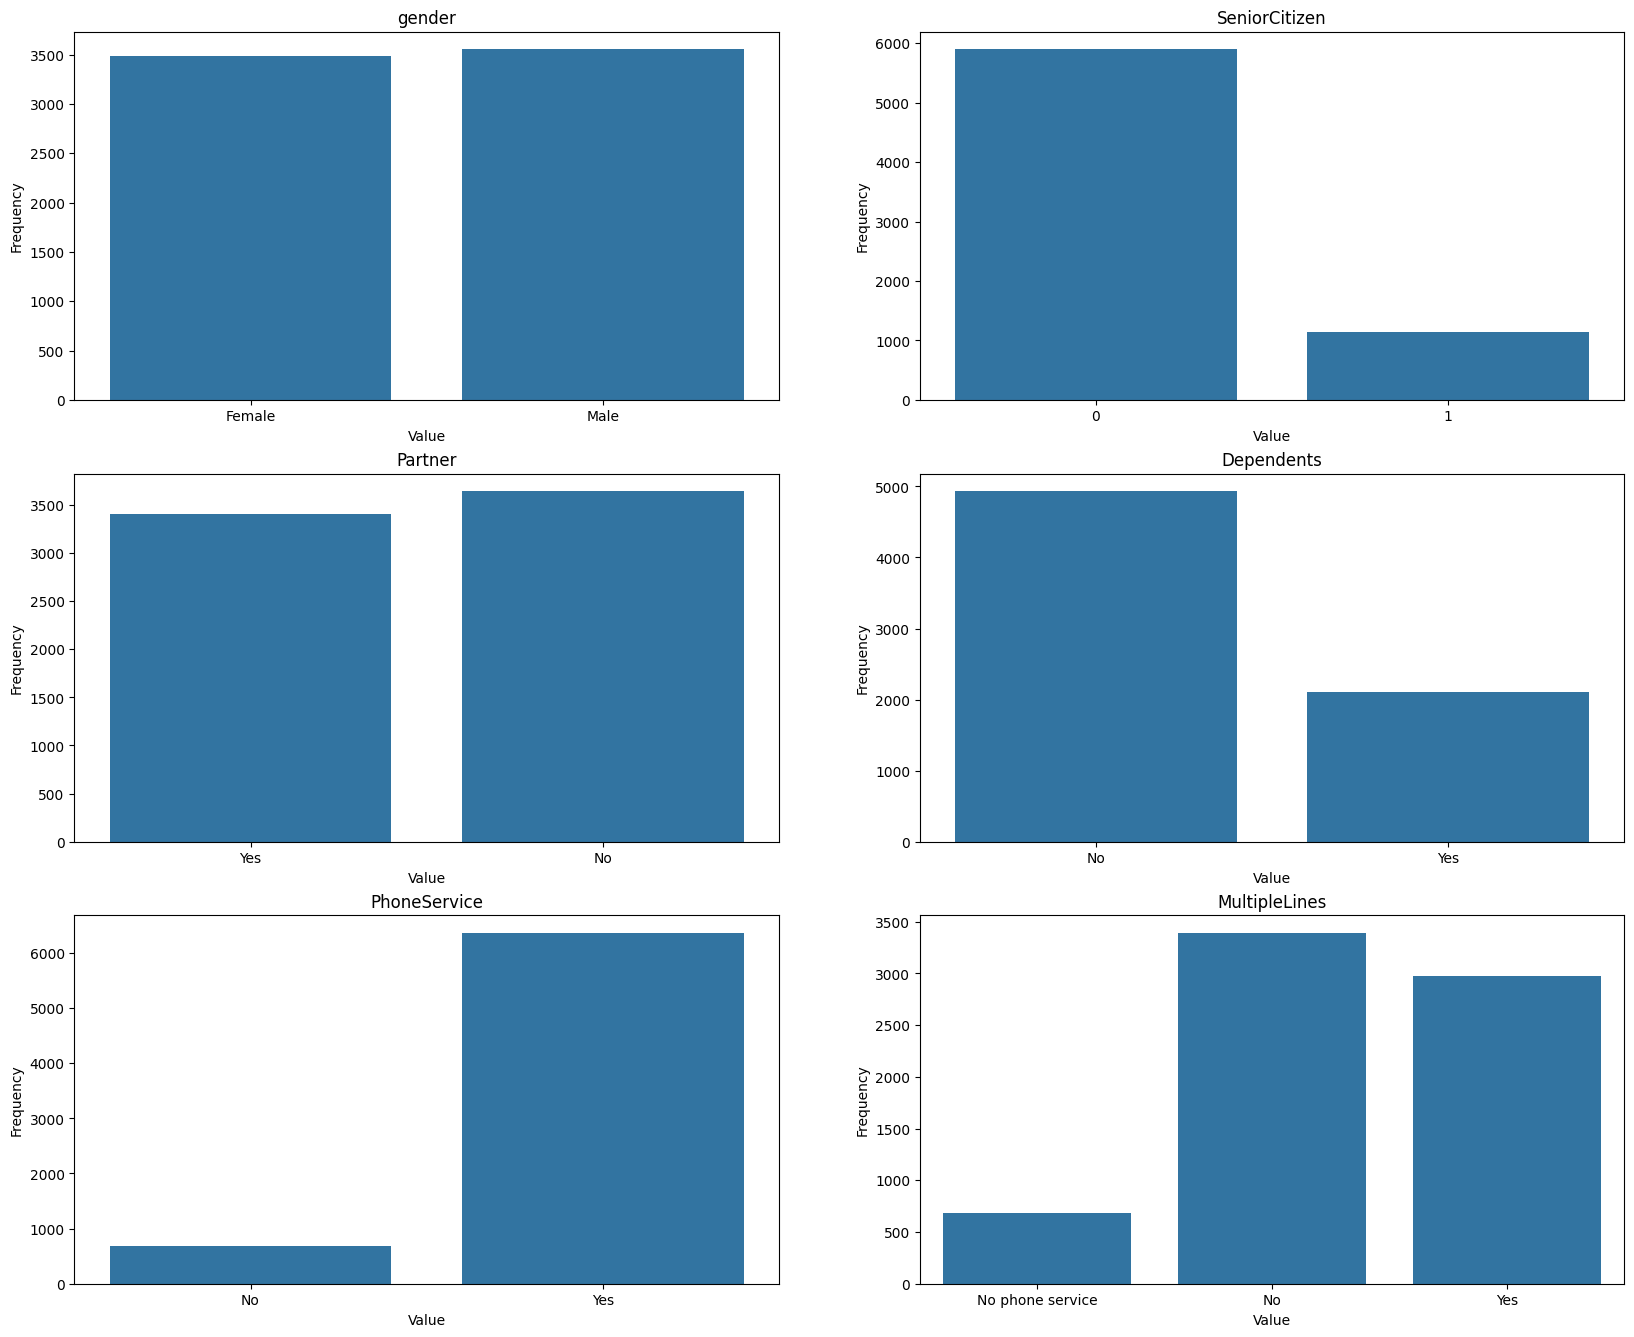

In [14]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', ]):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= data[column], data=data)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Count plot for categorical features:


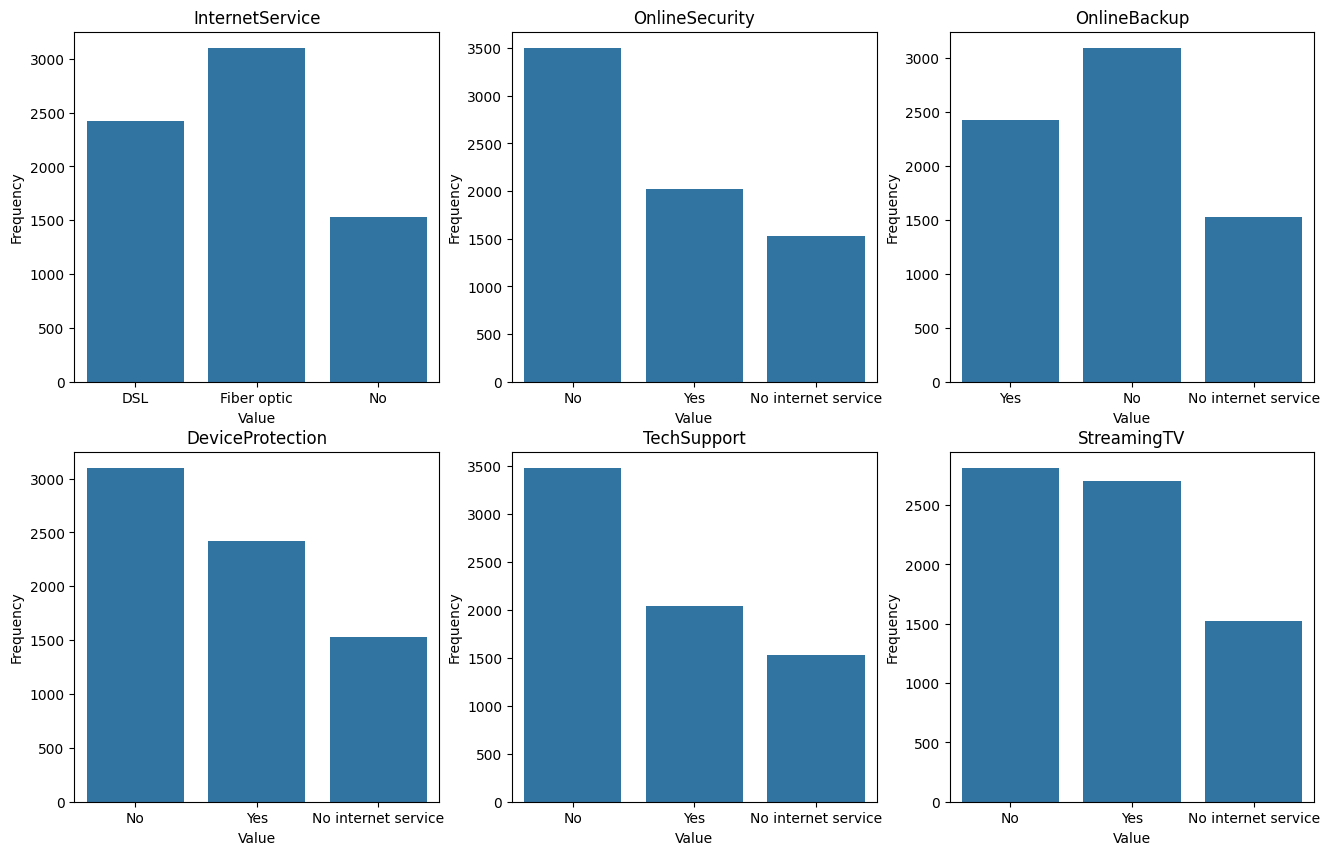

In [15]:
print("Count plot for categorical features:")
plt.figure(figsize=(16,10))

for i, column in enumerate(['InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV']):
    plt.subplot(2,3,i + 1)
    sns.countplot(x= data[column], data=data)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Count plot for categorical features:


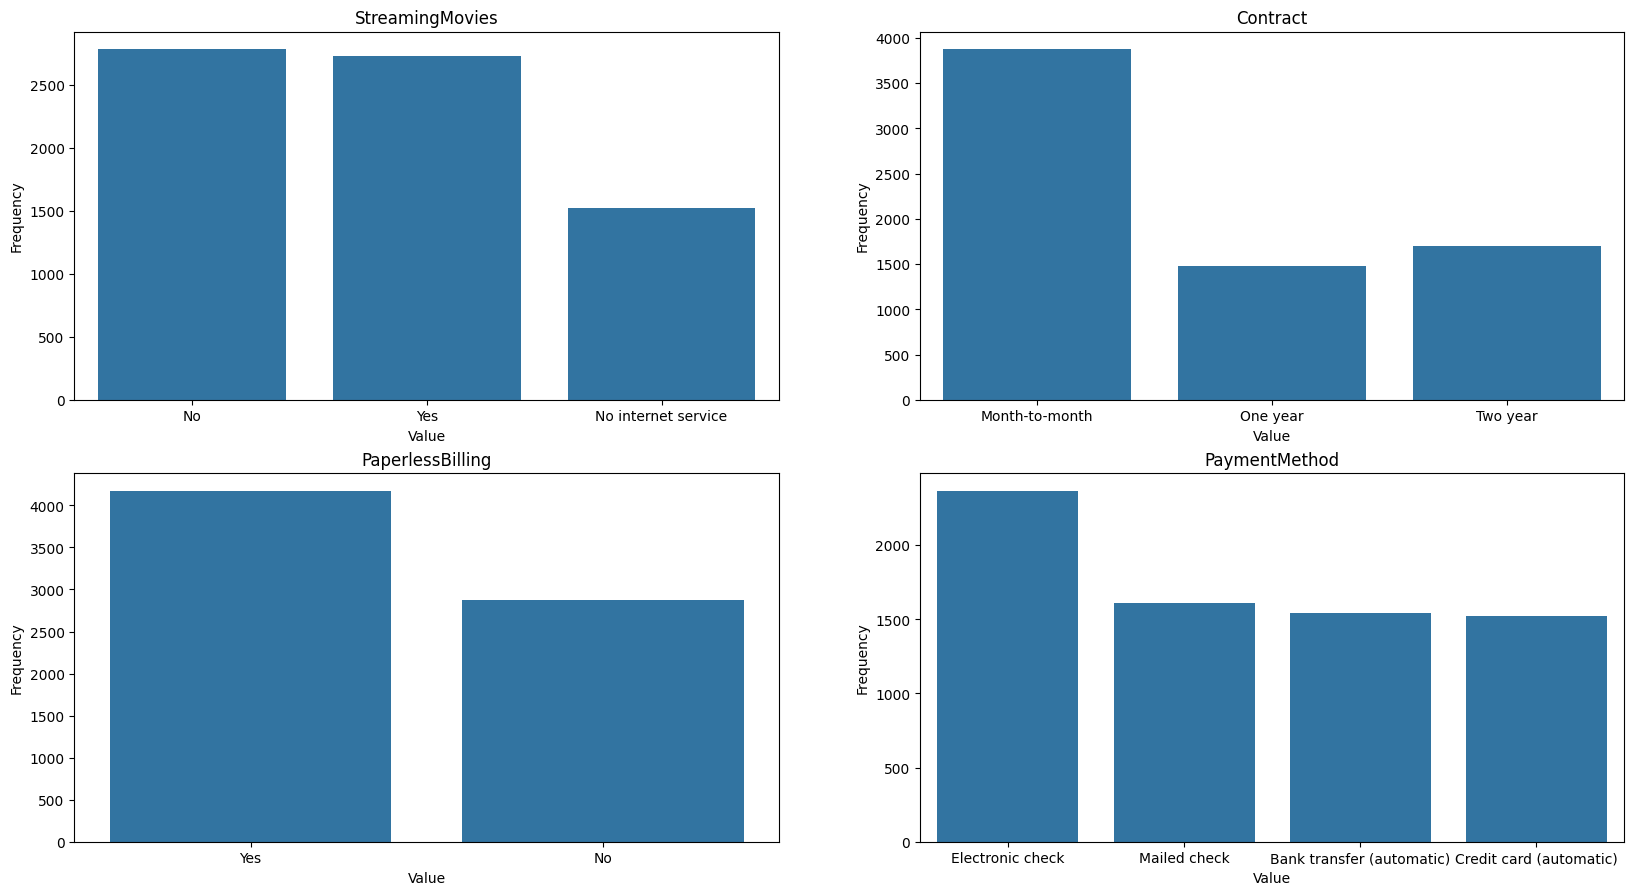

In [16]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= data[column], data=data)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

In [17]:
# Types of Contract relative to Churn

data.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64

In [18]:
# # Types of Payment Method relative to Churn

data.groupby('PaymentMethod')['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: count, dtype: int64

In [19]:
# Types of InternetService and SeniorCitizen relative to Churn

print(data.groupby('InternetService')['Churn'].value_counts())
data.groupby('SeniorCitizen')['Churn'].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: count, dtype: int64


SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: count, dtype: int64

# Data Visulization

In [20]:
# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

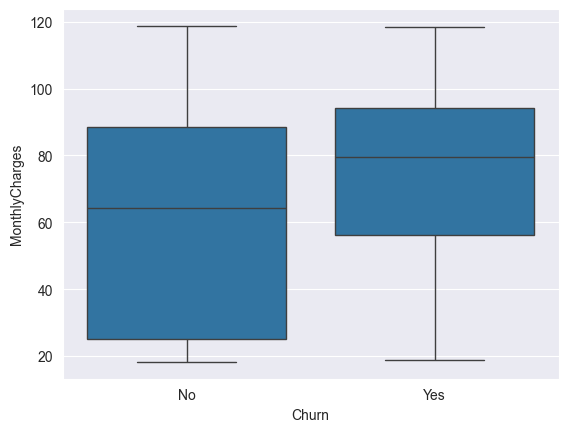

In [21]:
# Box-plot of Monthly Chatges by Churn

sb.set_style("darkgrid")
sb.boxplot(x= 'Churn',
          y= 'MonthlyCharges',
          data= data)

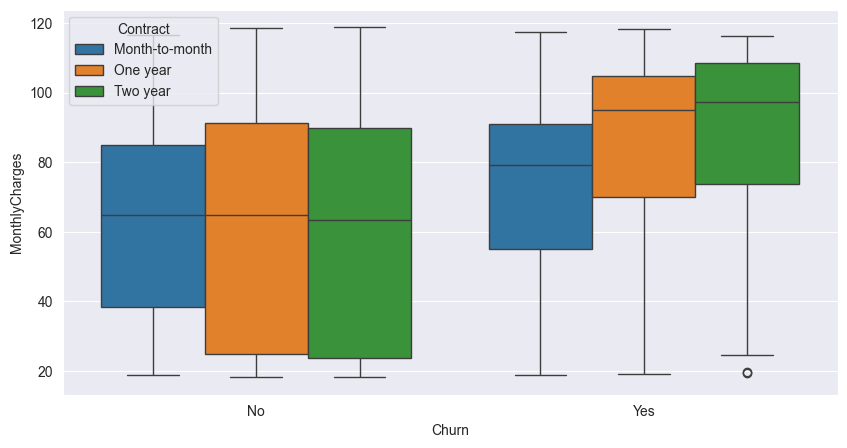

In [22]:
# Box-plot of Monthly Charges by Churn and divided by Contract

sb.set_style("darkgrid")
plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'MonthlyCharges',
          hue = 'Contract',
          data= data)
plt.legend(title='Contract', loc='upper left')

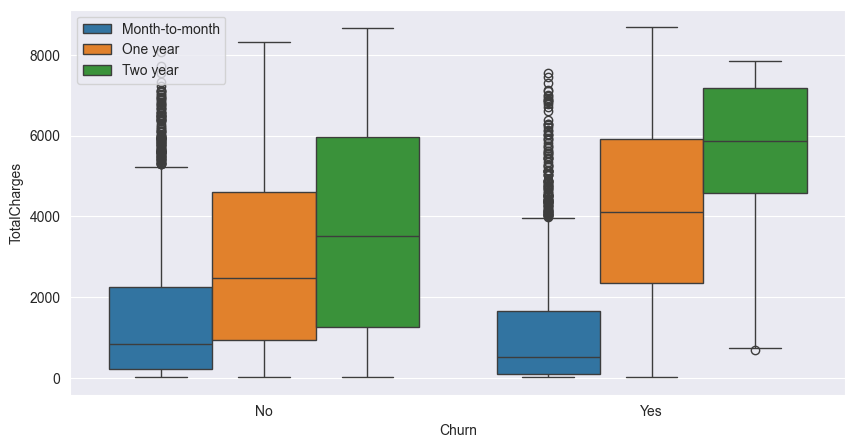

In [23]:
# Box-plot of Total Charges by Churn and divided by Contract

plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'TotalCharges',
          hue = 'Contract',
          data= data)
plt.legend(loc= 'upper left')

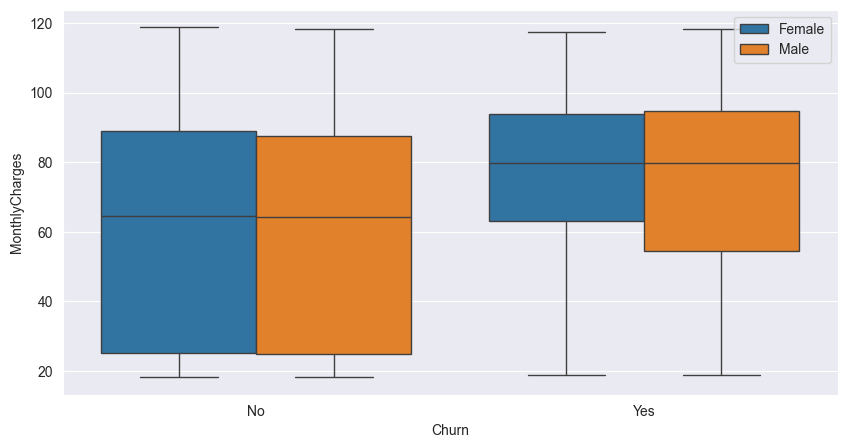

In [24]:
# Box-plot of Monthly Charges by Churn divided by gender

plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'MonthlyCharges',
          hue = 'gender',
          data= data)
plt.legend(loc= 'upper right')

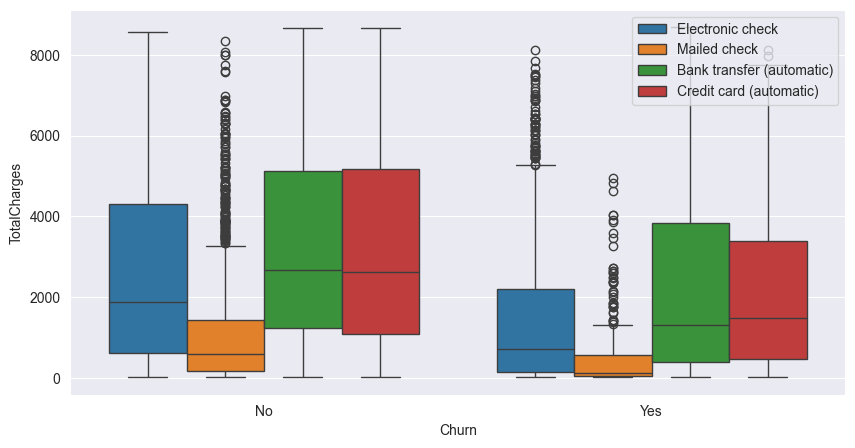

In [25]:
# Box-plot of Total Charges by Churn and divided by payment method

plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'TotalCharges',
          hue = 'PaymentMethod',
          data= data)
plt.legend(loc= 'upper right')

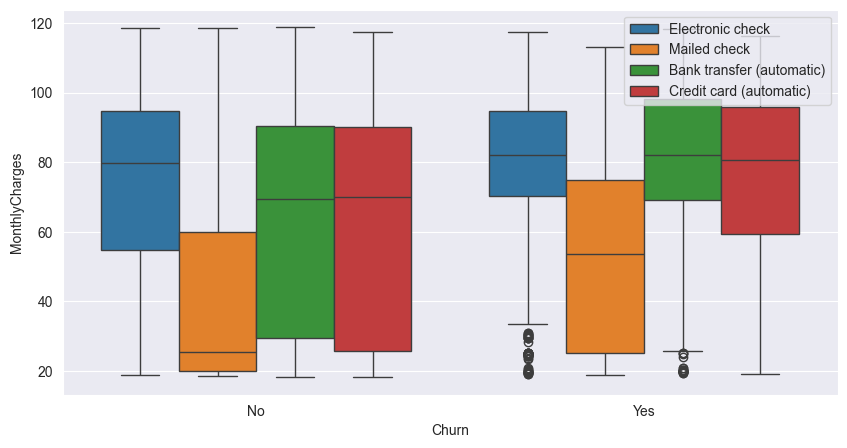

In [26]:
# Box-plot of Monthly Charges by Churn and divided by payment method

plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'MonthlyCharges',
          hue = 'PaymentMethod',
          data= data)
plt.legend(loc= 'upper right')

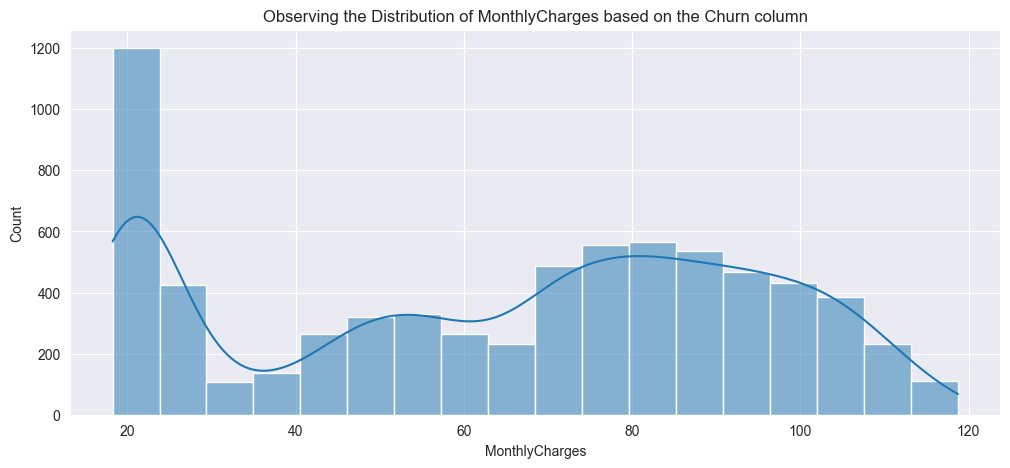

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True)
plt.title('Observing the Distribution of MonthlyCharges based on the Churn column')
plt.show()

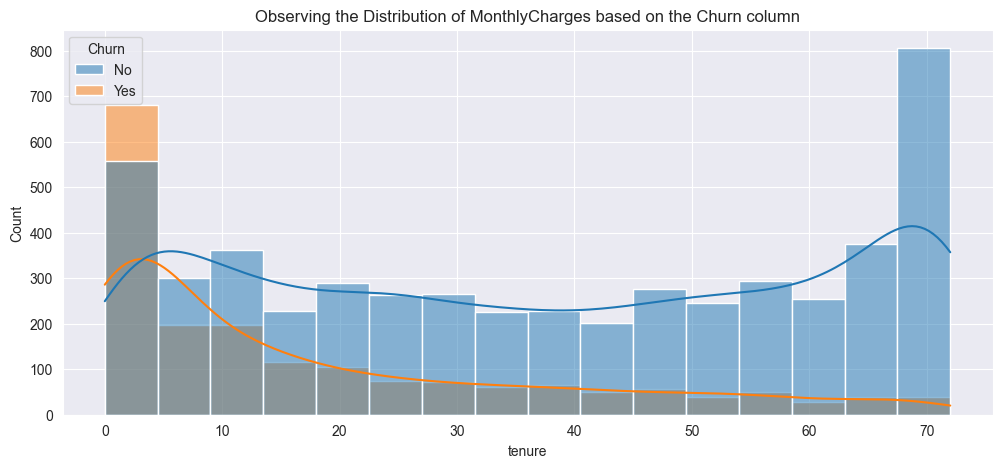

In [28]:
plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True)
plt.title('Observing the Distribution of MonthlyCharges based on the Churn column')
plt.show()

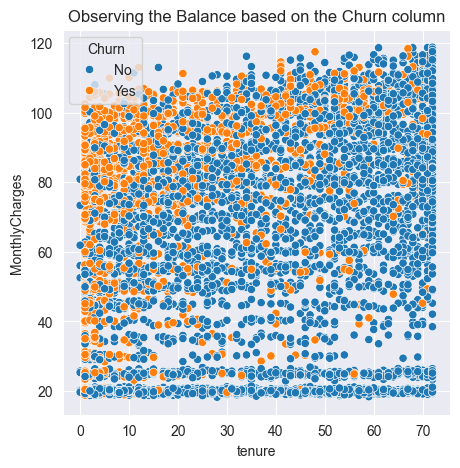

In [29]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Observing the Balance based on the Churn column')
plt.show()

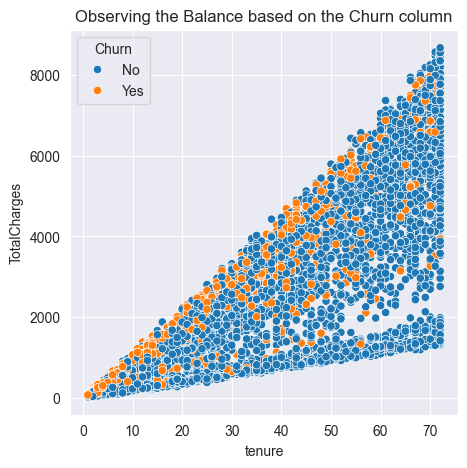

In [30]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=data)
plt.title('Observing the Balance based on the Churn column')
plt.show()

# Business Recommendation

In [31]:
# Cleaning and preparing data for logistic regression

data['Partner']= data['Partner'].replace({'No': 0, 'Yes': 1})
data['gender']= data['gender'].replace({'Female': 0, 'Male': 1})
data['Dependents']= data['Dependents'].replace({'No': 0, 'Yes': 1})
data['PhoneService']= data['PhoneService'].replace({'No': 0, 'Yes': 1})
data['Contract']= data['Contract'].replace({'One year': 0, 'Two year': 1, 'Month-to-month': 2 })

C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\1175468047.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Partner']= data['Partner'].replace({'No': 0, 'Yes': 1})
C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\1175468047.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender']= data['gender'].replace({'Female': 0, 'Male': 1})
C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\1175468047.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

In [32]:
data['Contract'].value_counts()

Contract
2    3875
1    1695
0    1473
Name: count, dtype: int64

In [33]:
# Removing NaN and Infinite value 

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)

# Ignore below. You will learn machine learning algorithms in later class

# Data Model

In [34]:
# Importing machine learning libraries

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [35]:
# Normalize data and selecting variable for the model

data_n= data[['gender','Partner','Dependents','tenure','PhoneService','Contract','TotalCharges']]
normalized_data = preprocessing.scale(data_n)

In [36]:
# Splitting test and train data

x= normalized_data
y= data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=232)

In [37]:
# Cheacking if the data has normalized or not

x_train

array([[ 0.99053183, -0.96662231, -0.65401193, ...,  0.32743831,
        -0.42530691,  0.99459179],
       [-1.00955867,  1.03453023, -0.65401193, ...,  0.32743831,
         0.82175245,  2.06236891],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  0.32743831,
         0.82175245, -0.01196014],
       ...,
       [-1.00955867, -0.96662231, -0.65401193, ...,  0.32743831,
         0.82175245, -0.87094477],
       [-1.00955867, -0.96662231, -0.65401193, ...,  0.32743831,
         0.82175245,  0.92211034],
       [-1.00955867, -0.96662231, -0.65401193, ..., -3.05401039,
         0.82175245, -0.83488062]], shape=(5282, 7))

In [38]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
print(lr.coef_)
print(lr.intercept_)

[[-0.01029604  0.0539976  -0.24191678 -2.29440627 -0.11904206  0.53770204
   1.66574843]]
[-1.55589605]


In [40]:
y_pred = lr.predict(x_test)

In [41]:
print('Confusion Metrix')
cm= confusion_matrix(y_test, y_pred)
print(cm)
print('')
print('Accuracy of the Model')
print(metrics.accuracy_score(y_test, y_pred))

Confusion Metrix
[[1159  147]
 [ 248  207]]

Accuracy of the Model
0.7756956274843839
